In [2]:
!pip install playsound pyaudio pydub ffmpeg-python

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
# Link for tutorial: https://www.thepythoncode.com/article/play-and-record-audio-sound-in-python

# Importing stuff!
from playsound import playsound
from pydub import AudioSegment
from pydub.playback import play
import pyaudio
import wave
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Saina\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
C:\Users\Saina\Anaconda3\lib\site-packages\pydub\utils.py:179: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [4]:
# We're playing a file!
playsound("metallic-drums.wav")

In [5]:
# We're recording something here!

# the file name output you want to record into
filename = "recorded.wav"
# set the chunk size of 1024 samples
chunk = 1024
# sample format
FORMAT = pyaudio.paInt16
# mono, change to 2 if you want stereo
channels = 1
# 44100 samples per second
sample_rate = 44100
record_seconds = 5
# initialize PyAudio object
p = pyaudio.PyAudio()
# open stream object as input & output
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
frames = []
print("Recording...")
for i in range(int(44100 / chunk * record_seconds)):
    data = stream.read(chunk)
    # if you want to hear your voice while recording
    # stream.write(data)
    frames.append(data)
print("Finished recording.")
# stop and close stream
stream.stop_stream()
stream.close()
# terminate pyaudio object
p.terminate()
# save audio file
# open the file in 'write bytes' mode
wf = wave.open(filename, "wb")
# set the channels
wf.setnchannels(channels)
# set the sample format
wf.setsampwidth(p.get_sample_size(FORMAT))
# set the sample rate
wf.setframerate(sample_rate)
# write the frames as bytes
wf.writeframes(b"".join(frames))
# close the file
wf.close()

Recording...
Finished recording.


In [6]:
# This plays the recorded sound
playsound("recorded.wav")

In [7]:
# This finds the Frequency of the recorded sound
Fs, data = read('recorded.wav')
# Here we are only using only one channel to keep it simple. We are using channel 0
#data = data[:,0]
print ('Sampling frequency is ', Fs)

Sampling frequency is  44100


In [8]:
# This also plays it
Audio(data, rate=Fs)

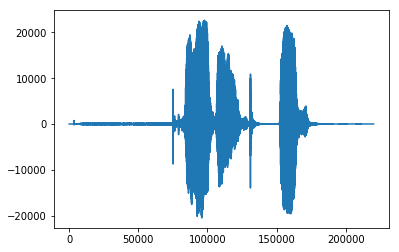

In [9]:
#This plots it!

plt.figure()
plt.plot(data)
#plt.xlabel('Sample Index')
#plt.ylabel('Amplitude')
#plt.title('Waveform of Test Audio')
plt.show()